## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>

This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).

The dataset we use for this part is the [STL10 dataset](https://cs.stanford.edu/~acoates/stl10/) which consists of $5,000$ training images of airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck; each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. 
2. `BaseImageClassifier`: A base class image classfication, which is basically a CNN model.

*Note*: You may need to install the package `imutils` if you have not installed yet

Firstly, we need to run the following cells to load required packages.

In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
from A1_S2_2023 import DatasetManager, BaseImageClassifier

Note that the class `DatasetManager` has attributes related to *the training, validation, and testing sets*. You can use them in training your developped models in the sequel.

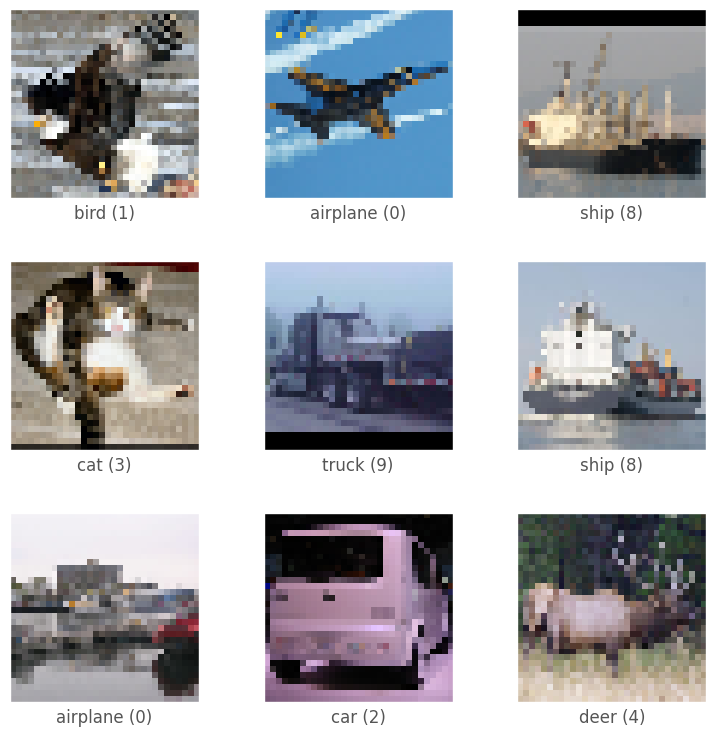

In [3]:
dataset_name = 'stl10'
# Choose path to store dataset
data_dir = '{}/tensorflow_datasets'.format(os.path.expanduser('~'))

data_manager = DatasetManager(dataset_name, data_dir)
data_manager.load_dataset() 
data_manager.preprocess_dataset()
data_manager.show_examples()

In [4]:
# Choose a random example
import random
num_examples = tf.data.experimental.cardinality(data_manager.ds_train).numpy()
random_index = random.randint(0, num_examples - 1)
example = next(iter(data_manager.ds_train.skip(random_index).take(1)))[0]

# Print the shape and value of the image
print("Image shape:", example.shape)
print("Image value range:", example.numpy().min(), "to", example.numpy().max())

Image shape: (32, 32, 3)
Image value range: 0.0 to 1.0


In [5]:
# Check the number of examples in each dataset
print(tf.data.experimental.cardinality(data_manager.ds_train))
print(tf.data.experimental.cardinality(data_manager.ds_val))
print(tf.data.experimental.cardinality(data_manager.ds_test))

tf.Tensor(4500, shape=(), dtype=int64)
tf.Tensor(500, shape=(), dtype=int64)
tf.Tensor(8000, shape=(), dtype=int64)


We now use **BaseImageClassifier** built in the **A1_S2_2023.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated with.

In [6]:
network1 = BaseImageClassifier(name='network1',
                       num_classes=10,
                       optimizer='sgd',
                       batch_size=128,
                       num_epochs=20,
                       learning_rate=0.001)

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **A1_S2_2023.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [7]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

In [8]:
x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = network1.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
network1.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 14s 94ms/step - loss: 2.2977 - accuracy: 0.1087 - val_loss: 2.2834 - val_accuracy: 0.1100
Epoch 2/20
141/141 [==============================] - 11s 75ms/step - loss: 2.2570 - accuracy: 0.1431 - val_loss: 2.2094 - val_accuracy: 0.1800
Epoch 3/20
141/141 [==============================] - 10s 71ms/step - loss: 2.1096 - accuracy: 0.2447 - val_loss: 2.0291 - val_accuracy: 0.2760
Epoch 4/20
141/141 [==============================] - 11s 76ms/step - loss: 1.9647 - accuracy: 0.2942 - val_loss: 1.9165 - val_accuracy: 0.3340
Epoch 5/20
141/141 [==============================] - 10s 70ms/step - loss: 1.8919 - accuracy: 0.3220 - val_loss: 1.8577 - val_accuracy: 0.3380
Epoch 6/20
141/141 [==============================] - 8s 57ms/step - loss: 1.8250 - accuracy: 0.3438 - val_loss: 1.8073 - val_accuracy: 0.3400
Epoch 7/20
141/141 [==============================] - 9s 61ms/step - loss: 1.7655 - accuracy: 0.3602 - val_loss: 1.7524 - val_accuracy: 0

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [9]:
x_test_batch = network1.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
network1.compute_accuracy(x_test_batch)

250/250 [==============================] - 9s 34ms/step - loss: 1.5564 - accuracy: 0.4371
loss: 1.5563602447509766
accuracy: 0.43712499737739563


Below shows how you can inspect the training progress.

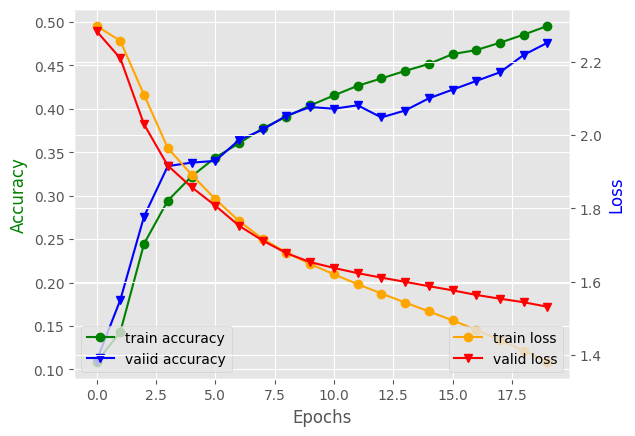

In [10]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [11]:
num_samples = 25
sample_dataset = data_manager.ds_test.take(num_samples)
network1.predict(sample_dataset.batch(num_samples), data_manager.ds_info)

Sample 1: Predicted label - ship
Sample 2: Predicted label - cat
Sample 3: Predicted label - cat
Sample 4: Predicted label - bird
Sample 5: Predicted label - truck
Sample 6: Predicted label - dog
Sample 7: Predicted label - deer
Sample 8: Predicted label - horse
Sample 9: Predicted label - airplane
Sample 10: Predicted label - deer
Sample 11: Predicted label - deer
Sample 12: Predicted label - truck
Sample 13: Predicted label - horse
Sample 14: Predicted label - ship
Sample 15: Predicted label - deer
Sample 16: Predicted label - cat
Sample 17: Predicted label - deer
Sample 18: Predicted label - airplane
Sample 19: Predicted label - truck
Sample 20: Predicted label - truck
Sample 21: Predicted label - dog
Sample 22: Predicted label - horse
Sample 23: Predicted label - car
Sample 24: Predicted label - truck
Sample 25: Predicted label - airplane


Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

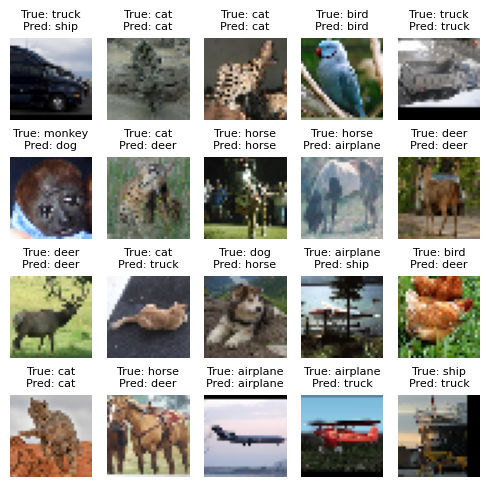

In [12]:
num_samples = 20
sample_dataset = data_manager.ds_test.take(num_samples)
network1.plot_predictions(sample_dataset, data_manager.ds_info, num_samples=num_samples, grid_shape=(4, 5))

### <span style="color:#0b486b">Question 3.1: Observe the learning curve</span> 
After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

The model generally performs well as it has a good curve. However, the accuracy of the model is not the best as it only reaches a maximum of 0.5. If we ran the model for more epochs, then there could potentially be a higher resulting accuracy level. 

As the architecture makes use of 2 separate mean pooling layers, a lot of the information of the image inputs is lost. Therefore, the model will not be able to perform as accurately. Hence, in order to have an improvement, the model should use only 1 layer of pooling



**For questions 3.2 to 3.9**, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters which you can find in function `__init__()` for the class `BaseImageClassifier`:

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, activations

tf.random.set_seed(3181)

### <span style="color:#0b486b">Question 3.2: Define your CNN</span>

Write the code of the `YourModel` class here. Note that this class will be inherited from the `BaseImageClassifier` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [14]:
class YourModel(BaseImageClassifier):

    def __init__(
        self,
        name="myModel",
        width=32,
        height=32,
        depth=3,
        num_blocks=2,
        feature_maps=32,
        num_classes=4,
        drop_rate=0.2,
        batch_norm=None,
        is_augmentation=False,
        activation_func="relu",
        optimizer="adam",
        use_skip=True,
        batch_size=10,
        num_epochs=20,
        learning_rate=0.0001,
        verbose=True,
    ):
        super(YourModel, self).__init__(
            name,
            width,
            height,
            depth,
            num_blocks,
            feature_maps,
            num_classes,
            drop_rate,
            batch_norm,
            is_augmentation,
            activation_func,
            use_skip,
            optimizer,
            batch_size,
            num_epochs,
            learning_rate,
            verbose,
        )

    def build_cnn(self):
        self.model = models.Sequential()

        for feature_map in self.feature_maps:
            # First Conv
            self.model.add(layers.Conv2D(
                    feature_map,
                    (3, 3),
                    padding="same",
                    input_shape=(self.height, self.width, self.depth),
                ))

            if self.batch_norm:
                self.model.add(layers.BatchNormalization())

            self.model.add(layers.Activation(self.activation_func.lower()))

            # Second Conv
            self.model.add(self.create_conv_layer(feature_map))

            if self.batch_norm:
                self.model.add(layers.BatchNormalization())

            # If skip con
            if self.use_skip:
                self.model.add(self.create_conv_layer(feature_map))

            self.model.add(layers.Activation(self.activation_func.lower()))

            # Mean pool + drop out
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding="same"))

            self.model.add(layers.Dropout(self.drop_rate))

        self.model.add(layers.Flatten())

        self.model.add(layers.Dense(self.num_classes, activation="softmax"))

        self.model.compile(
            optimizer=self.optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )

    def compute_accuracy(self, ds_test):
        evaluation_results = self.model.evaluate(ds_test)
        metrics = ['loss', 'accuracy']
        # Print the evaluation results
        for metric, result in zip(metrics, evaluation_results):
            print(f'{metric}: {result}')

        return evaluation_results

    def create_conv_layer(self, feature_map):
        return layers.Conv2D(
                    feature_map,
                    (3, 3),
                    padding="same",
                )

### <span style="color:#0b486b">Question 3.3: Experiment with skip connection</span> 
Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....




In [15]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=True,
                     optimizer='adam',
                     learning_rate=0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)       

In [16]:
x_train_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

our_network_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 19s 127ms/step - loss: 1.8672 - accuracy: 0.3351 - val_loss: 2.9287 - val_accuracy: 0.1220
Epoch 2/20
141/141 [==============================] - 19s 133ms/step - loss: 1.4729 - accuracy: 0.4516 - val_loss: 2.1973 - val_accuracy: 0.2480
Epoch 3/20
141/141 [==============================] - 25s 179ms/step - loss: 1.2803 - accuracy: 0.5244 - val_loss: 1.9304 - val_accuracy: 0.3600
Epoch 4/20
141/141 [==============================] - 19s 137ms/step - loss: 1.1208 - accuracy: 0.5880 - val_loss: 1.7125 - val_accuracy: 0.4260
Epoch 5/20
141/141 [==============================] - 16s 114ms/step - loss: 0.9827 - accuracy: 0.6444 - val_loss: 1.8189 - val_accuracy: 0.4300
Epoch 6/20
141/141 [==============================] - 19s 132ms/step - loss: 0.8245 - accuracy: 0.7049 - val_loss: 2.0280 - val_accuracy: 0.4560
Epoch 7/20
141/141 [==============================] - 23s 164ms/step - loss: 0.6994 - accuracy: 0.7556 - val_loss: 2.2654 - val_ac

250/250 [==============================] - 15s 59ms/step - loss: 2.4670 - accuracy: 0.5462
loss: 2.4670443534851074
accuracy: 0.5462499856948853


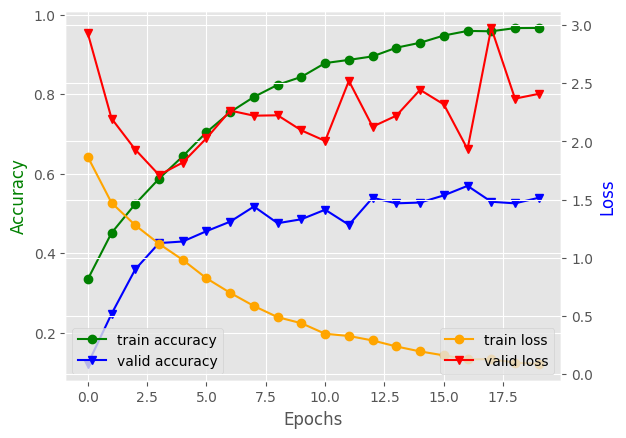

In [17]:
x_test_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
our_network_skip.compute_accuracy(x_test_batch)

our_network_skip.plot_progress()

In [18]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 16, 16, 32)       

In [19]:
x_train_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

our_network_no_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 18s 117ms/step - loss: 1.7859 - accuracy: 0.3478 - val_loss: 2.6451 - val_accuracy: 0.1200
Epoch 2/20
141/141 [==============================] - 12s 89ms/step - loss: 1.3526 - accuracy: 0.5104 - val_loss: 2.9341 - val_accuracy: 0.1600
Epoch 3/20
141/141 [==============================] - 11s 76ms/step - loss: 1.1617 - accuracy: 0.5924 - val_loss: 2.3379 - val_accuracy: 0.2740
Epoch 4/20
141/141 [==============================] - 11s 78ms/step - loss: 1.0179 - accuracy: 0.6589 - val_loss: 1.8800 - val_accuracy: 0.3680
Epoch 5/20
141/141 [==============================] - 13s 96ms/step - loss: 0.8984 - accuracy: 0.7162 - val_loss: 1.7859 - val_accuracy: 0.4220
Epoch 6/20
141/141 [==============================] - 16s 113ms/step - loss: 0.7970 - accuracy: 0.7569 - val_loss: 1.8219 - val_accuracy: 0.4180
Epoch 7/20
141/141 [==============================] - 16s 112ms/step - loss: 0.7077 - accuracy: 0.7940 - val_loss: 1.7194 - val_accura

250/250 [==============================] - 9s 35ms/step - loss: 1.5895 - accuracy: 0.5307
loss: 1.5895320177078247
accuracy: 0.5307499766349792


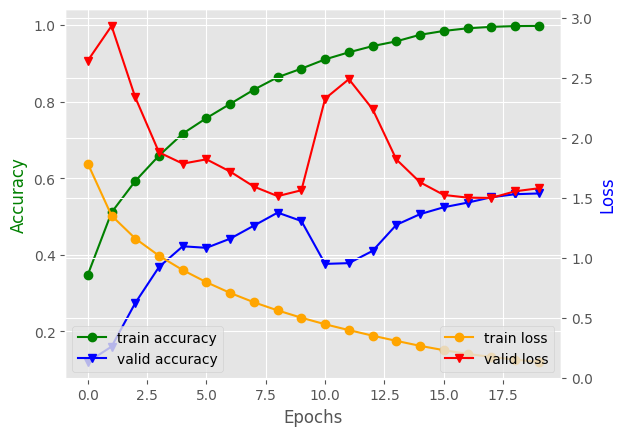

In [20]:
x_test_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
our_network_no_skip.compute_accuracy(x_test_batch)

our_network_no_skip.plot_progress()

### <span style="color:#0b486b">Question 3.4: Tune hyperparameters with grid search</span>

Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# REPORT THE BEST PARAMETERS AND THE TESTING ACCURACY HERE*

.....

In [21]:
class ModelResult:
    def __init__(self, num_block, use_skip, learning_rate):
        self.num_block = num_block
        self.use_skip = use_skip
        self.learning_rate = learning_rate

    def add_accuracy(self, accuracy):
        self.accuracy = accuracy

    def __str__(self):
        return f'Num of blocks: {self.num_block} | Use skip: {self.use_skip} | Learning rate: {self.learning_rate} | Accuracy: {self.accuracy}'

In [22]:
num_blocks = [2, 3, 4]
use_skips = [True, False]
learning_rates = [1e-3, 1e-4]

values = [(num_block, use_skip, learning_rate) for num_block in num_blocks for use_skip in use_skips for learning_rate in learning_rates]

results = []

for num_block, use_skip, learning_rate in values:
    result = ModelResult(num_block, use_skip, learning_rate)

    current_model = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=num_block,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=use_skip,
                     optimizer='sgd',
                     learning_rate=learning_rate)
    current_model.build_cnn()

    x_train_batch = current_model.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
    x_val_batch = current_model.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

    current_model.fit(x_train_batch, x_val_batch, num_epochs=20)

    x_test_batch = current_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
    _, accuracy = current_model.compute_accuracy(x_test_batch)

    result.add_accuracy(accuracy)
    results.append(result)

for result in results:
    print(str(result))

Epoch 1/20
141/141 [==============================] - 15s 97ms/step - loss: 1.8085 - accuracy: 0.3273 - val_loss: 2.8499 - val_accuracy: 0.0880
Epoch 2/20
141/141 [==============================] - 15s 108ms/step - loss: 1.3637 - accuracy: 0.4944 - val_loss: 2.8556 - val_accuracy: 0.1640
Epoch 3/20
141/141 [==============================] - 17s 119ms/step - loss: 1.1585 - accuracy: 0.5813 - val_loss: 1.8103 - val_accuracy: 0.3660
Epoch 4/20
141/141 [==============================] - 19s 132ms/step - loss: 1.0034 - accuracy: 0.6462 - val_loss: 1.6312 - val_accuracy: 0.4400
Epoch 5/20
141/141 [==============================] - 15s 103ms/step - loss: 0.8805 - accuracy: 0.6976 - val_loss: 1.5795 - val_accuracy: 0.4640
Epoch 6/20
141/141 [==============================] - 13s 94ms/step - loss: 0.7815 - accuracy: 0.7411 - val_loss: 1.4568 - val_accuracy: 0.4960
Epoch 7/20
141/141 [==============================] - 15s 104ms/step - loss: 0.7010 - accuracy: 0.7780 - val_loss: 1.3326 - val_accu

In [45]:
highest_acc, best_num_block, best_use_skip, best_learning_rate = 0.5868750214576721, 4, True, 0.001

### <span style="color:#0b486b">Question 3.5: Apply data augmentation</span>

We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [55]:
class YourModel(BaseImageClassifier):
    def __init__(
        self,
        name="network1",
        width=32,
        height=32,
        depth=3,
        num_blocks=2,
        feature_maps=32,
        num_classes=4,
        drop_rate=0.2,
        batch_norm=None,
        is_augmentation=False,
        activation_func="relu",
        use_skip=True,
        optimizer="adam",
        batch_size=10,
        num_epochs=20,
        learning_rate=0.0001,
    ):
        super(YourModel, self).__init__(
            name,
            width,
            height,
            depth,
            num_blocks,
            feature_maps,
            num_classes,
            drop_rate,
            batch_norm,
            is_augmentation,
            activation_func,
            use_skip,
            optimizer,
            batch_size,
            num_epochs,
            learning_rate,
        )

    def build_cnn(self):
        self.model = models.Sequential()

        for feature_map in self.feature_maps:
            # First Conv
            self.model.add(
                layers.Conv2D(
                    feature_map,
                    (3, 3),
                    padding="same",
                    input_shape=(self.height, self.width, self.depth),
                )
            )

            if self.batch_norm:
                self.model.add(layers.BatchNormalization())

            self.model.add(layers.Activation(self.activation_func.lower()))

            # Second Conv
            self.model.add(self.create_conv_layer(feature_map))

            if self.batch_norm:
                self.model.add(layers.BatchNormalization())

            # If skip con
            if self.use_skip:
                self.model.add(self.create_conv_layer(feature_map))

            self.model.add(layers.Activation(self.activation_func.lower()))

            # Mean pool + drop out
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding="same"))

            self.model.add(layers.Dropout(self.drop_rate))

        self.model.add(layers.Flatten())

        self.model.add(layers.Dense(self.num_classes, activation="softmax"))

        self.model.compile(
            optimizer=self.optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )

    def compute_accuracy(self, ds_test):
        evaluation_results = self.model.evaluate(ds_test)
        metrics = ["loss", "accuracy"]
        # Print the evaluation results
        for metric, result in zip(metrics, evaluation_results):
            print(f"{metric}: {result}")

        return evaluation_results

    def create_conv_layer(self, feature_map):
        return layers.Conv2D(
            feature_map,
            (3, 3),
            padding="same",
        )

    def fit(self, data_manager, batch_size=None, num_epochs=None):

        batch_size = batch_size if batch_size else self.batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs

        x_train_batch = self.optimize_data_pipeline(data_manager.ds_train, batch_size=batch_size)
        x_val_batch = self.optimize_data_pipeline(data_manager.ds_val, batch_size=batch_size)

        if self.is_augmentation:
            X_train, y_train = self.extract_xy_dataset(x_train_batch)
            
            datagen = ImageDataGenerator()
            datagen.fit(X_train)

            _ = datagen.flow(
                X_train, y_train, batch_size=batch_size if batch_size else self.batch_size
            )

            steps = len(X_train) // (batch_size if batch_size else self.batch_size)
            self.history = self.model.fit(
                X_train,
                y_train,
                epochs=num_epochs,
                steps_per_epoch=steps,
                validation_data=x_val_batch,
                callbacks=[EarlyStopping(patience=3, monitor='val_loss', mode='min')]
            )
    
        else:
            self.history = self.model.fit(
                x_train_batch,
                epochs=num_epochs, 
                validation_data=x_val_batch, 
                callbacks=[EarlyStopping(patience=3, monitor='val_loss', mode='min')]
            )

    def extract_xy_dataset(self, dataset):
        x_data, y_data = [], []

        for x, y in dataset.as_numpy_iterator():
            x_data += list(x)
            y_data += list(y)

        return np.array(x_data), np.array(y_data)

### <span style="color:#0b486b">Question 3.6: Observe model performance with data augmentation</span>

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and not using it.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [56]:
data_aug_model = YourModel(name='data_aug_model',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=best_num_block,
                      drop_rate=0.0,
                      batch_norm=True,
                      is_augmentation=True,
                      use_skip=best_use_skip,
                      optimizer='adam',
                      batch_size=32,
                      learning_rate=best_learning_rate)
                      
data_aug_model.build_cnn()
data_aug_model.fit(data_manager, batch_size = 32, num_epochs = 20)


Epoch 1/20
140/140 [==============================] - 40s 269ms/step - loss: 2.1773 - accuracy: 0.2364 - val_loss: 3.5273 - val_accuracy: 0.0880
Epoch 2/20
 96/140 [===================>..........] - ETA: 11s - loss: 1.8038 - accuracy: 0.3204

KeyboardInterrupt: 

250/250 [==============================] - 6s 23ms/step - loss: 2.4483 - accuracy: 0.0880
loss: 2.4482738971710205
accuracy: 0.08799999952316284


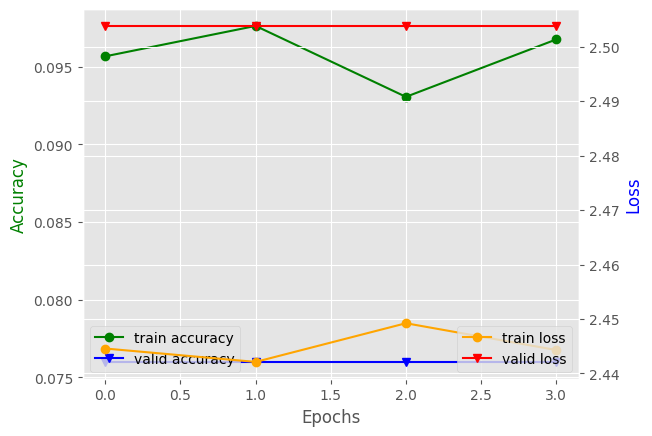

In [39]:
x_test_batch = data_aug_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
data_aug_model.compute_accuracy(x_test_batch)

data_aug_model.plot_progress()

In [40]:
best_regular_model = YourModel(name='data_aug_model',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=best_num_block,
                      drop_rate=0.0,
                      batch_norm=True,
                      is_augmentation=False,
                      use_skip=best_use_skip,
                      optimizer='adam',
                      batch_size=32,
                      learning_rate=best_learning_rate)

best_regular_model.build_cnn()
best_regular_model.fit(data_manager, batch_size = 32, num_epochs = 20)

Epoch 1/20
141/141 [==============================] - 5s 29ms/step - loss: 2.4446 - accuracy: 0.0960 - val_loss: 2.5038 - val_accuracy: 0.0760
Epoch 2/20
141/141 [==============================] - 2s 16ms/step - loss: 2.4446 - accuracy: 0.0960 - val_loss: 2.5038 - val_accuracy: 0.0760
Epoch 3/20
141/141 [==============================] - 3s 21ms/step - loss: 2.4446 - accuracy: 0.0960 - val_loss: 2.5038 - val_accuracy: 0.0760
Epoch 4/20
141/141 [==============================] - 3s 19ms/step - loss: 2.4446 - accuracy: 0.0960 - val_loss: 2.5038 - val_accuracy: 0.0760


250/250 [==============================] - 6s 22ms/step - loss: 2.4483 - accuracy: 0.0880
loss: 2.4482738971710205
accuracy: 0.08799999952316284


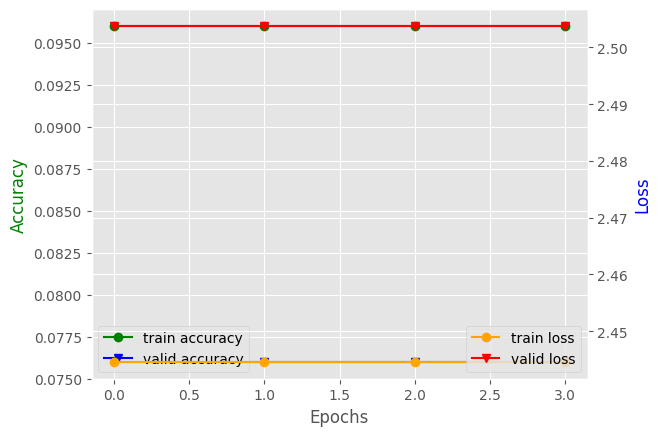

In [41]:
x_test_batch = best_regular_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
best_regular_model.compute_accuracy(x_test_batch)

best_regular_model.plot_progress()

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

The resulting accuracy of the data augmentation model is greater than of the other model. Therefore, we can observe that with/without data augmentation will produce better results and hence is more preferred. 

Besides that, with the inclusion of early stopping, we can clearly see that the regular model does not perform as well as it was required to perform early stopping during its starting phases due to its validation accuracy not increasing. This also points to the fact that the data augmentation model does indeed perform better than its regular counterpart. 

### <span style="color:#0b486b">Question 3.7: Explore data mixup technique</span>

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....


In [42]:
class YourModel(BaseImageClassifier):
    def __init__(
        self,
        name="network1",
        width=32,
        height=32,
        depth=3,
        num_blocks=2,
        feature_maps=32,
        num_classes=4,
        drop_rate=0.2,
        batch_norm=None,
        is_augmentation=False,
        activation_func="relu",
        use_skip=True,
        optimizer="adam",
        batch_size=10,
        num_epochs=20,
        learning_rate=0.0001,
    ):
        super(YourModel, self).__init__(
            name,
            width,
            height,
            depth,
            num_blocks,
            feature_maps,
            num_classes,
            drop_rate,
            batch_norm,
            is_augmentation,
            activation_func,
            use_skip,
            optimizer,
            batch_size,
            num_epochs,
            learning_rate,
        )

    def build_cnn(self):
        self.model = models.Sequential()

        for feature_map in self.feature_maps:
            # First Conv
            self.model.add(
                layers.Conv2D(
                    feature_map,
                    (3, 3),
                    padding="same",
                    input_shape=(self.height, self.width, self.depth),
                )
            )

            if self.batch_norm:
                self.model.add(layers.BatchNormalization())

            self.model.add(layers.Activation(self.activation_func.lower()))

            # Second Conv
            self.model.add(self.create_conv_layer(feature_map))

            if self.batch_norm:
                self.model.add(layers.BatchNormalization())

            # If skip con
            if self.use_skip:
                self.model.add(self.create_conv_layer(feature_map))

            self.model.add(layers.Activation(self.activation_func.lower()))

            # Mean pool + drop out
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding="same"))

            self.model.add(layers.Dropout(self.drop_rate))

        self.model.add(layers.Flatten())

        self.model.add(layers.Dense(self.num_classes, activation="softmax"))

        self.model.compile(
            optimizer=self.optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )

    def compute_accuracy(self, ds_test):
        evaluation_results = self.model.evaluate(ds_test)
        metrics = ["loss", "accuracy"]
        # Print the evaluation results
        for metric, result in zip(metrics, evaluation_results):
            print(f"{metric}: {result}")

        return evaluation_results

    def create_conv_layer(self, feature_map):
        return layers.Conv2D(
            feature_map,
            (3, 3),
            padding="same",
        )

    def fit(self, data_manager, batch_size=None, num_epochs=None):
        alpha = 0.2

        # Getting training and validation datasets
        x_train_batch = self.optimize_data_pipeline(data_manager.ds_train, batch_size=batch_size)
        x_val_batch = self.optimize_data_pipeline(data_manager.ds_val, batch_size=batch_size)

        # Getting appropriate values
        batch_size = batch_size if batch_size else self.batch_size
        num_epochs = num_epochs if num_epochs else self.num_epochs

        # Using data mixup
        x1, y1 = self.extract_xy_dataset(x_train_batch)
        x2, y2 = x1.copy(), y1.copy()

        lam = np.random.beta(alpha, alpha)

        x_lam = tf.reshape(lam, (x1.shape[0], 1, 1, 1))
        y_lam = tf.reshape(lam, (y1.shape[0], 1))

        final_x = x1 * x_lam + x1 * (1 - x_lam)
        final_y = y1 * y_lam + y2 * (1 - y_lam)

        # Manipulating validation values
        x_val, y_val = self.extract_xy_dataset(x_val_batch)

        y_val_hot_vectors = [[0 if j == y_val[i] else 1 for j in range(y_val.max() + 1)] for i in range(y_val.shape[0])]
        
        self.history = self.model.fit(
                final_x,
                final_y,
                epochs=num_epochs,
                validation_data=(x_val, y_val_hot_vectors),
                callbacks=[EarlyStopping(patience=3, monitor='val_loss', mode='min')]
            )
        
    def extract_xy_dataset(self, dataset):
        x_data, y_data = [], []

        for x, y in dataset.as_numpy_iterator():
            x_data += list(x)
            y_data += list(y)

        return np.array(x_data), np.array(y_data)

In [52]:
data_mixup_model = YourModel(name='data_mixup_model',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=best_num_block,
                      drop_rate=0.0,
                      batch_norm=True,
                      is_augmentation=False,
                      use_skip=best_use_skip,
                      optimizer='adam',
                      batch_size=32,
                      learning_rate=best_learning_rate)

data_mixup_model.build_cnn()
data_mixup_model.fit(data_manager, batch_size = 32, num_epochs = 20)

Epoch 1/20
141/141 [==============================] - 37s 249ms/step - loss: 2.1243 - accuracy: 0.2418 - val_loss: 2.6576 - val_accuracy: 0.1200
Epoch 2/20
141/141 [==============================] - 35s 248ms/step - loss: 1.7432 - accuracy: 0.3307 - val_loss: 3.9327 - val_accuracy: 0.1000
Epoch 3/20
141/141 [==============================] - 34s 244ms/step - loss: 1.6095 - accuracy: 0.3840 - val_loss: 1.9203 - val_accuracy: 0.3180
Epoch 4/20
141/141 [==============================] - 64s 458ms/step - loss: 1.5125 - accuracy: 0.4244 - val_loss: 1.7475 - val_accuracy: 0.3640
Epoch 5/20
141/141 [==============================] - 51s 360ms/step - loss: 1.4558 - accuracy: 0.4402 - val_loss: 1.7623 - val_accuracy: 0.3620
Epoch 6/20
141/141 [==============================] - 49s 346ms/step - loss: 1.3893 - accuracy: 0.4733 - val_loss: 1.8423 - val_accuracy: 0.3520
Epoch 7/20
141/141 [==============================] - 59s 419ms/step - loss: 1.3315 - accuracy: 0.4996 - val_loss: 1.6625 - val_ac

250/250 [==============================] - 26s 105ms/step - loss: 1.8205 - accuracy: 0.3979
loss: 1.8205329179763794
accuracy: 0.39787501096725464


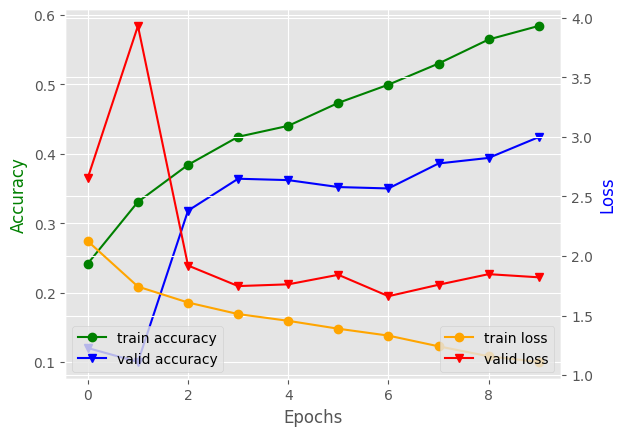

In [53]:
x_test_batch = data_mixup_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
data_mixup_model.compute_accuracy(x_test_batch)

data_mixup_model.plot_progress()

### <span style="color:#0b486b">Question 3.8: Attack your model</span>

Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [90]:
def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model.model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image

In [91]:
def mim_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              gamma= 0.9,
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        gamma: momentum decay
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    adv_noise = random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model.model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image

In [92]:
def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3, 
               clip_value_min=0., 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        output = model.model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples 
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

In [93]:
from tensorflow.keras.applications import VGG19
import math
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

In [94]:
epsilon, k, n = 0.0313, 20, 0.002

best_obtained_model = data_aug_model

x_test, y_test = best_obtained_model.extract_xy_dataset(best_obtained_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32))

In [95]:
def get_random_images_labels(n, dataset, labels):
    rand_imgs, rand_labels, indices = [], [], [-1]

    for _ in range(n):
        i = -1
        while i in indices:
            i = np.random.randint(0, dataset.shape[0])

        rand_imgs.append(dataset[i])
        rand_labels.append(labels[i])


    return np.array(rand_imgs), np.array(rand_labels)

def plot_images(images, num_row=1, num_col=20, label="Original Image"):
    shown_label = label

    fig = plt.figure(figsize=(15, 15*num_col))
    for i in range(num_col):
        plt.subplot(num_row,num_col,i+1)
        plt.imshow(images[i])
        plt.xlabel(shown_label, fontsize=5)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    plt.tight_layout()
    plt.show()

In [96]:
# Attacks
rand_imgs, rand_labels = get_random_images_labels(20, x_test, y_test)

images_arr = [
    rand_imgs,
    pgd_attack(
        best_obtained_model,
        rand_imgs,
        rand_labels,
        epsilon=epsilon,
        num_steps=k,
        step_size=n,
        from_logits=False,
    ),
    mim_attack(
        best_obtained_model,
        rand_imgs,
        rand_labels,
        epsilon=epsilon,
        num_steps=k,
        step_size=n,
        from_logits=False,
    ),
    fgsm_attack(
        best_obtained_model, rand_imgs, rand_labels, epsilon=epsilon, from_logits=False
    ),
]

# pgd_imgs = pgd_attack(best_obtained_model, rand_imgs, rand_labels, epsilon=epsilon, num_steps=k, step_size=n, from_logits=False)
# mim_imgs = mim_attack(best_obtained_model, rand_imgs, rand_labels, epsilon=epsilon, num_steps=k, step_size=n, from_logits=False)
# fgsm_imgs = fgsm_attack(best_obtained_model, rand_imgs, rand_labels, epsilon=epsilon, from_logits=False)

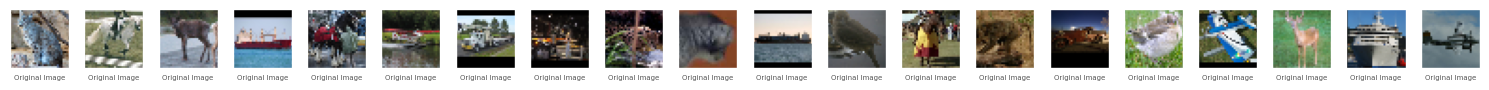

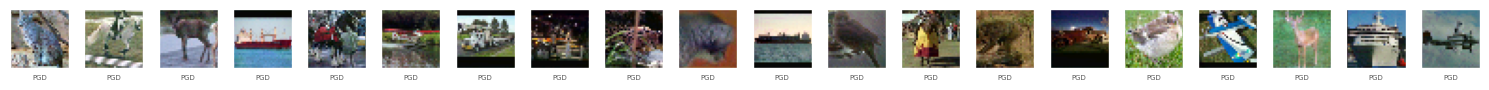

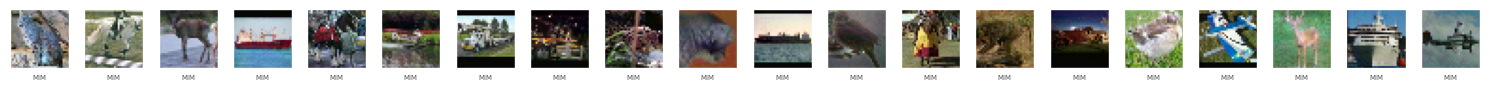

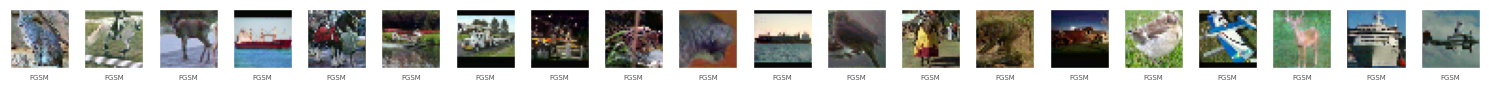

In [99]:
for imgs, label in zip(images_arr, ["Original Image", "PGD", "MIM", "FGSM"]):
    plot_images(imgs, label = label)

In [106]:
full_set = [
    x_test,
    pgd_attack(
        best_obtained_model,
        x_test,
        y_test,
        epsilon=epsilon,
        num_steps=k,
        step_size=n,
        from_logits=False,
    ),
    mim_attack(
        best_obtained_model,
        x_test,
        y_test,
        epsilon=epsilon,
        num_steps=k,
        step_size=n,
        from_logits=False,
    ),
    fgsm_attack(
        best_obtained_model, x_test, y_test, epsilon=epsilon, from_logits=False
    ),
]

In [108]:
for imgs in full_set:
    batch_set = tf.data.Dataset.from_tensor_slices((imgs, y_test))
    x_test_batch = best_obtained_model.optimize_data_pipeline(batch_set, batch_size=32)
    best_obtained_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 18s 70ms/step - loss: 2.8598 - accuracy: 0.1205
loss: 2.859781503677368
accuracy: 0.12049999833106995
250/250 [==============================] - 16s 64ms/step - loss: 3.1326 - accuracy: 0.1046
loss: 3.132556915283203
accuracy: 0.10462500154972076
250/250 [==============================] - 19s 74ms/step - loss: 3.1304 - accuracy: 0.1049
loss: 3.130364179611206
accuracy: 0.10487499833106995
250/250 [==============================] - 21s 81ms/step - loss: 3.1536 - accuracy: 0.1035
loss: 3.1535990238189697
accuracy: 0.10350000113248825


### <span style="color:#0b486b">Question 3.9: Train a robust model</span>

Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [109]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
optimizer = tf.optimizers.Adam(learning_rate=best_learning_rate)
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [115]:
def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        logits = best_obtained_model.model(x)
        logits_adv = best_obtained_model.model(x_adv)
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
        gradients = tape.gradient(loss, best_obtained_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, best_obtained_model.trainable_variables))
    return loss

In [116]:
x_train, y_train = best_obtained_model.extract_xy_dataset(best_obtained_model.optimize_data_pipeline(data_manager.ds_train))

epochs = 5 # number of epochs
for epoch in range(epochs):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(60000, verbose=2)

    # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
    x_adv = pgd_attack(best_obtained_model, x_train, y_train, epsilon, k, n, 0.0, 1.0)
    loss = train_step_adv(x_train, x_adv, y_train)
    y_pred = best_obtained_model(x)
    test_acc_clean(y, y_pred)
    train_loss(loss)
    progress_bar_train.add(x_train.shape[0], values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])

c:\Users\User\anaconda3\envs\tf2_cpu\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


AttributeError: 'YourModel' object has no attribute 'trainable_variables'

In [ ]:
best_obtained_model.model.evaluate(full_set[1], y_test)

The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

### <span style="color:#0b486b">Question 3.10</span> (bonus question)

Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this technique to the best obtained model and report the results. For the purpose of implementing SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**